1. 

(X_train=80%)
(X_test=20%)

A partir del archivo "iris.csv" que se corresponde con datos relacionados con tres tipos de plantas (el target es el tipo de planta):

- Mediante knn, predice qué planta se corresponde con los ejemplos: [[15.7,2.8,9.5,0.1]] y [[1.7,3.8,4.5,11.3]] para k=3 y k=7
- ¿Qué acierto tiene tu modelo para k=3, k=7? (score)
- Entre 1 y 20, ¿qué k tiene un mejor acierto en tu modelo? visualiza el score con el valor de k en una gráfica.
- Utiliza un conjunto de test con el 60% de los datos: ¿cambian los resultados anteriores? ¿por qué?
- Elimina la clase "Setosa" de tus datos. Repite el proceso anterior, ¿cambian los resultados?
- ¿Consideras Knn un buen algoritmo para estos datos? ¿por qué?

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [35]:
iris_df = pd.read_csv('../data/iris.csv')

In [36]:
iris_df.shape

(150, 5)

In [37]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [38]:
iris_df.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [39]:
X =  iris_df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]
y = iris_df['variety']

In [40]:
X.shape

(150, 4)

In [41]:
y.shape

(150,)

In [42]:
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [43]:
y_train

133     Virginica
4          Setosa
37         Setosa
85     Versicolor
49         Setosa
          ...    
146     Virginica
62     Versicolor
132     Virginica
89     Versicolor
95     Versicolor
Name: variety, Length: 120, dtype: object

##  KNeighborsClassifier    k=3

In [44]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train, y_train)  

KNeighborsClassifier(n_neighbors=3)

In [45]:
predicted = model.predict([[15.7,2.8,9.5,0.1]]) 
print(predicted)

['Virginica']


In [46]:
predicted = model.predict([[1.7,3.8,4.5,11.3]]) 
print(predicted)

['Virginica']


In [47]:
y_pred = model.predict(X_test)
y_pred

array(['Setosa', 'Versicolor', 'Versicolor', 'Virginica', 'Versicolor',
       'Virginica', 'Virginica', 'Virginica', 'Setosa', 'Setosa',
       'Virginica', 'Virginica', 'Setosa', 'Virginica', 'Versicolor',
       'Virginica', 'Versicolor', 'Versicolor', 'Setosa', 'Setosa',
       'Versicolor', 'Setosa', 'Setosa', 'Versicolor', 'Versicolor',
       'Setosa', 'Setosa', 'Versicolor', 'Virginica', 'Versicolor'],
      dtype=object)

In [48]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


In [49]:
model.score(X_test, y_test)

0.9666666666666667

##  KNeighborsClassifier    k=7

In [50]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=7)

model.fit(X_train, y_train)  

KNeighborsClassifier(n_neighbors=7)

In [51]:
predicted = model.predict([[15.7,2.8,9.5,0.1]]) 
print(predicted)

['Virginica']


In [52]:
predicted = model.predict([[1.7,3.8,4.5,11.3]]) 
print(predicted)

['Virginica']


In [53]:
y_pred = model.predict(X_test)
y_pred

array(['Setosa', 'Versicolor', 'Versicolor', 'Virginica', 'Versicolor',
       'Virginica', 'Virginica', 'Virginica', 'Setosa', 'Setosa',
       'Virginica', 'Virginica', 'Setosa', 'Virginica', 'Versicolor',
       'Virginica', 'Versicolor', 'Versicolor', 'Setosa', 'Setosa',
       'Versicolor', 'Setosa', 'Setosa', 'Versicolor', 'Versicolor',
       'Setosa', 'Setosa', 'Virginica', 'Virginica', 'Virginica'],
      dtype=object)

In [54]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


In [55]:
model.score(X_test, y_test)

0.9666666666666667

### Comparando resultados con distintos valores de K (entre 1 y 20)

([<matplotlib.axis.XTick at 0x7fa0810216a0>,
 <a list of 5 Text major ticklabel objects>)

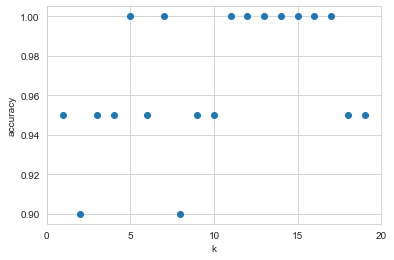

In [68]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

### Cambiando el conjunto de test al 60%

In [57]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60)

In [58]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=3)

In [59]:
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


([<matplotlib.axis.XTick at 0x7fa080e7a7f0>,
 <a list of 5 Text major ticklabel objects>)

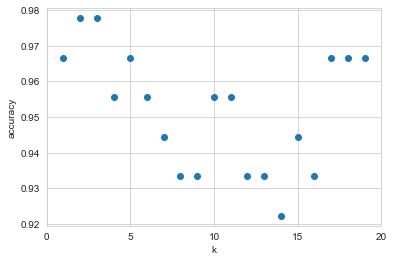

In [60]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

### Eliminando la clase Setosa


In [61]:
iris_df = iris_df[iris_df.variety !='Setosa']

In [62]:
iris_df.variety.value_counts()

Virginica     50
Versicolor    50
Name: variety, dtype: int64

In [63]:
X =  iris_df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]
y = iris_df['variety']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [65]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=3)

In [66]:
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.95


([<matplotlib.axis.XTick at 0x7fa080f667c0>,
 <a list of 5 Text major ticklabel objects>)

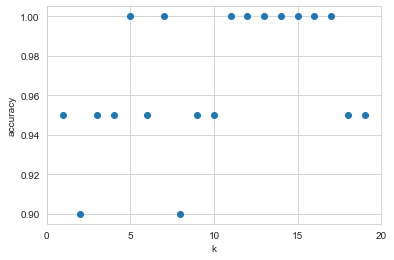

In [67]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

### ¿Consideras Knn un buen algoritmo para estos datos? ¿por qué?
`Sí porque se puede conseguir el valor de k donde el score del modelo sea cercano al 98%`